In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
leads=pd.read_csv("/Users/shagund/Downloads/Lead Scoring Assignment/Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**EXPLORATORY DATA ANALYSIS**

Data understanding, preparation

**Data Cleaning**

1)Handling the 'Select' level that is present in many of the categorical variables

In [7]:
# Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [8]:
# checking the columns for null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Finding the null percentages across columns
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [10]:
# dropping the columns with missing values greater than or equal to 40% .
leads=leads.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [11]:
# Finding the null percentages across columns after removing the above columns
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

1) Column: 'Specialization'

This column has 37% missing values

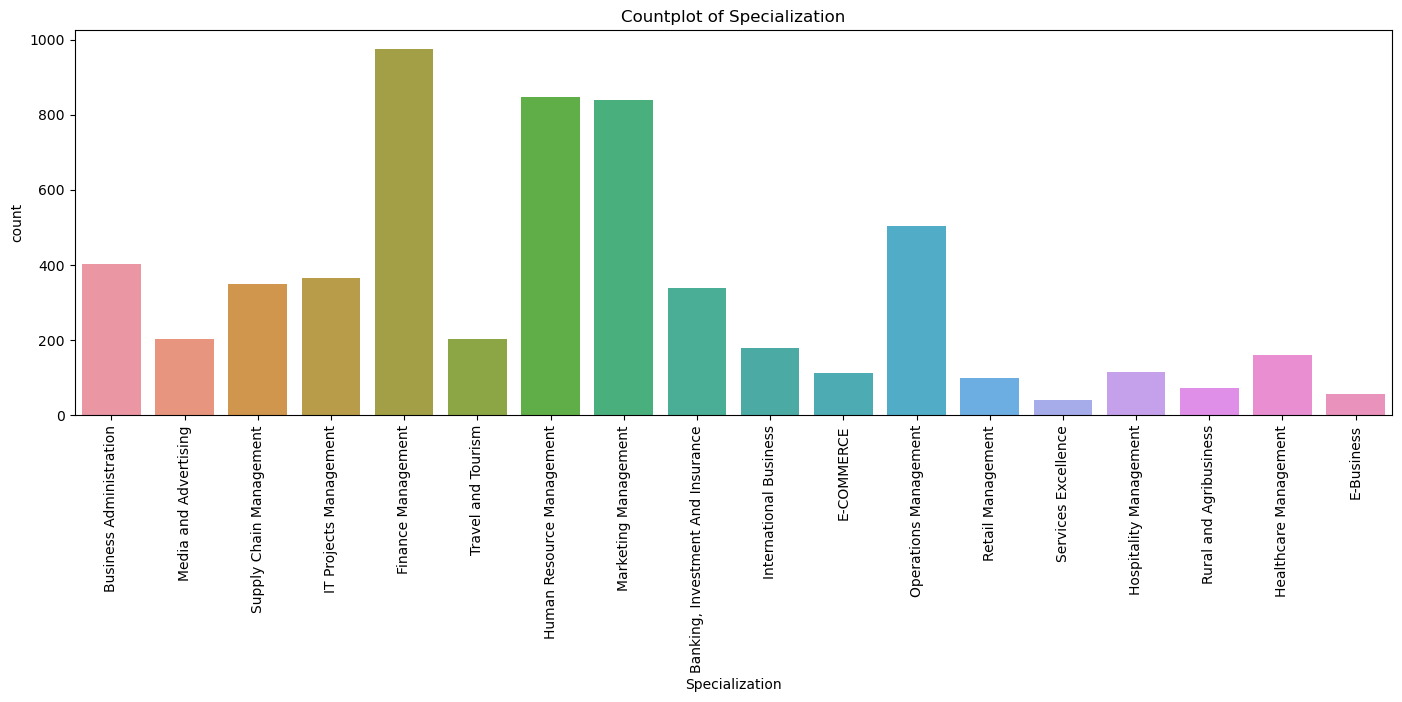

In [12]:
plt.figure(figsize=(17, 5))
sns.countplot(x='Specialization', data=leads)
plt.xticks(rotation=90)
plt.title("Countplot of Specialization")
plt.show()

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [13]:
# Creating a separate category called 'Others' for this
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

2) **Tags column**

'Tags' column has 36% missing values

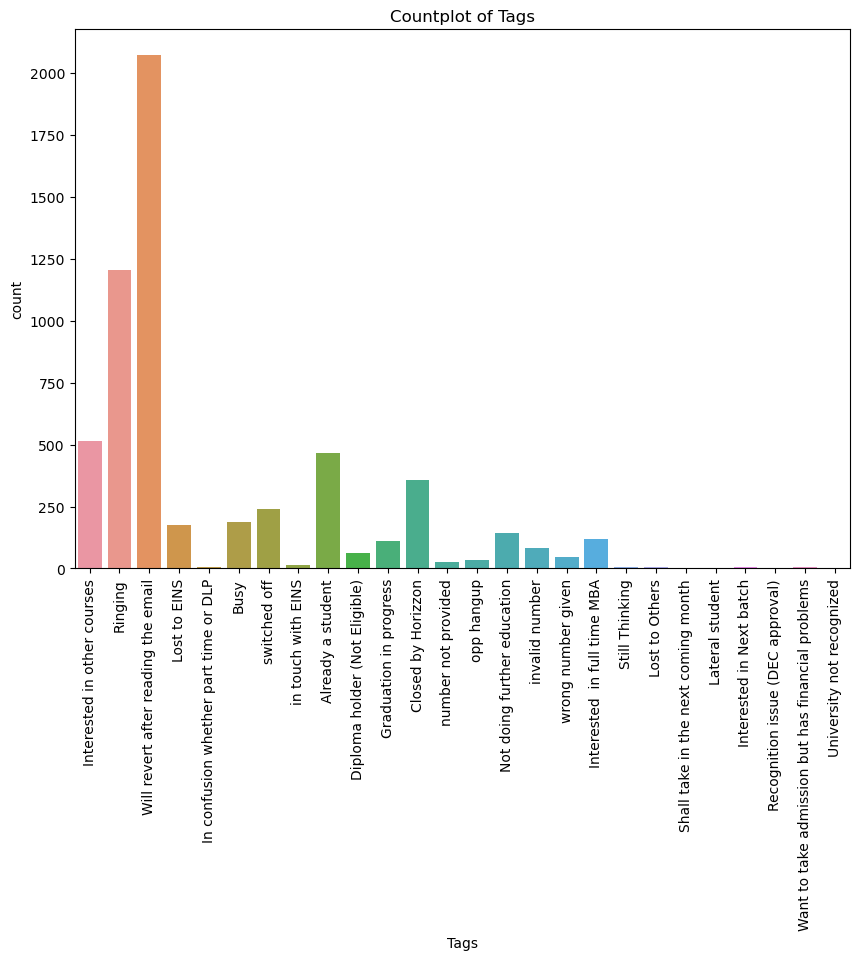

In [14]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Tags', data=leads)
plt.xticks(rotation=90)
plt.title("Countplot of Tags")
plt.show()

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [15]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
leads['Tags']=leads['Tags'].replace(np.nan,'Will revert after reading the email')

3) Column: 'What matters most to you in choosing a course'

this column has 29% missing values

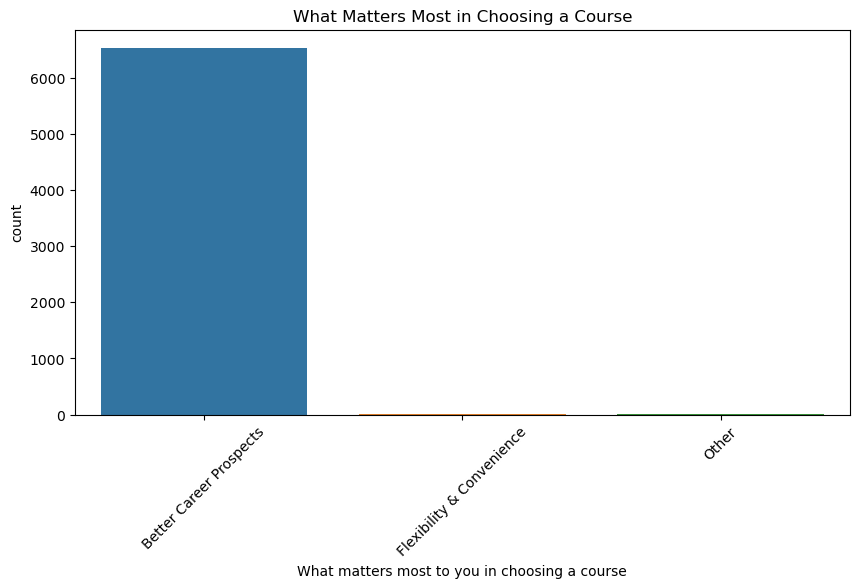

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x='What matters most to you in choosing a course', data=leads)
plt.xticks(rotation=45)
plt.title("What Matters Most in Choosing a Course")
plt.show()

In [17]:
# Finding the percentage of the different categories of this column:
round(leads['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

What matters most to you in choosing a course
Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: proportion, dtype: float64

We can see that this is highly skewed column so we can remove this column.

In [18]:
# Dropping this column
leads=leads.drop('What matters most to you in choosing a course',axis=1)

4) Column: 'What is your current occupation'

this column has 29% missing values

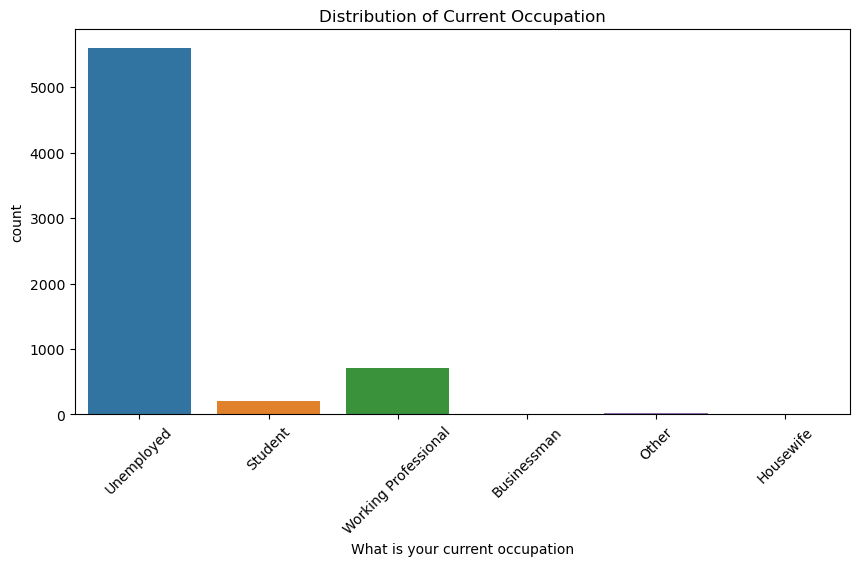

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='What is your current occupation', data=leads)
plt.xticks(rotation=45)
plt.title("Distribution of Current Occupation")
plt.show()

In [20]:
# Finding the percentage of the different categories of this column:
round(leads['What is your current occupation'].value_counts(normalize=True),2)*100

What is your current occupation
Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [21]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Unemployed')

5) Column: 'Country'

This column has 27% missing values

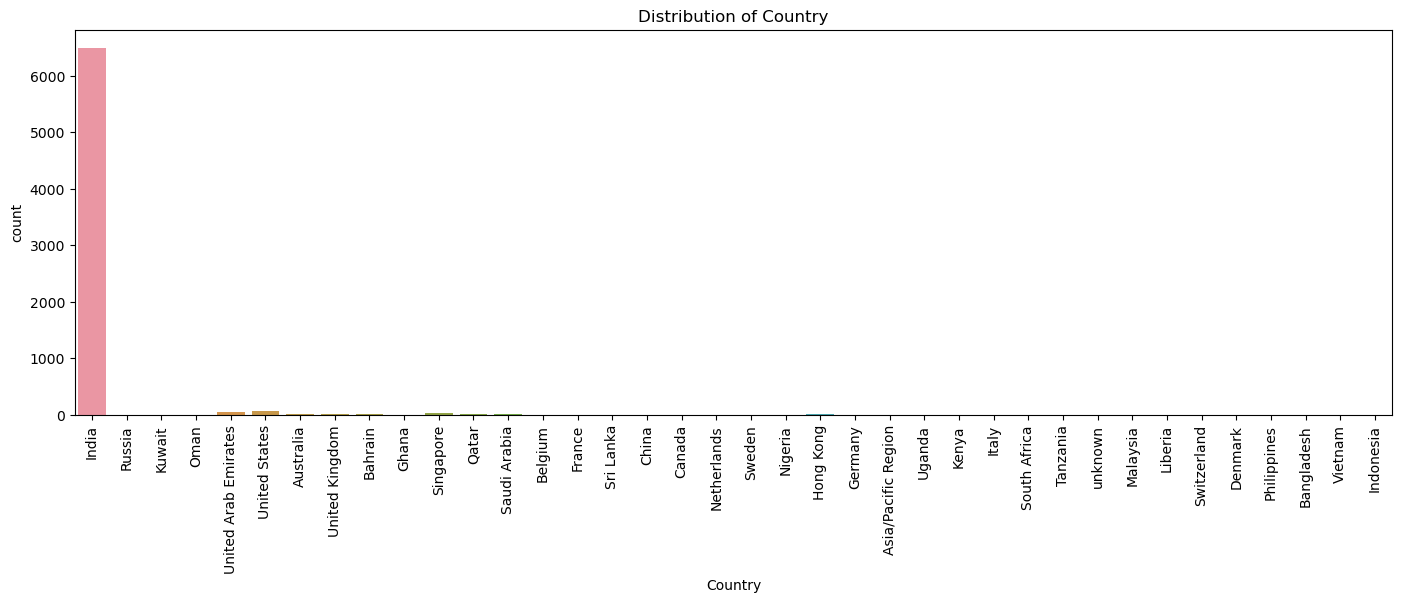

In [22]:
plt.figure(figsize=(17, 5))
sns.countplot(x='Country', data=leads)  # Specify 'x' explicitly
plt.xticks(rotation=90)
plt.title("Distribution of Country")
plt.show()

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [23]:
# Imputing the missing data in the 'Country' column with 'India'
leads['Country']=leads['Country'].replace(np.nan,'India')

6) Column: 'City'

This column has 40% missing values

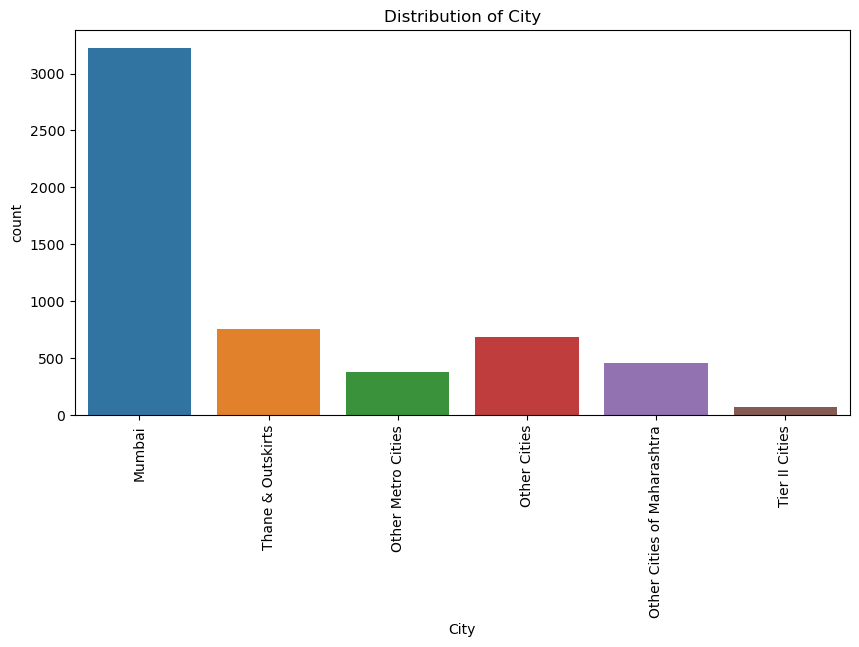

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='City', data=leads)
plt.xticks(rotation=90)
plt.title("Distribution of City")
plt.show()

In [25]:
# Finding the percentage of the different categories of this column:
round(leads['City'].value_counts(normalize=True),2)*100

City
Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [26]:
# Imputing the missing data in the 'City' column with 'Mumbai'
leads['City']=leads['City'].replace(np.nan,'Mumbai')

In [27]:
# Finding the null percentages across columns after removing the above columns
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Rest missing values are under 2% so we can drop these rows.

In [28]:
# Dropping the rows with null values
leads.dropna(inplace = True)

In [29]:
# Finding the null percentages across columns after removing the above columns
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset.

We can find the percentage of rows retained.

In [30]:
# Percentage of rows retained
(len(leads.index)/9240)*100

98.2034632034632

We have retained 98% of the rows after cleaning the data

**Exploratory Data Anaysis**

Checking for duplicates:

In [31]:
leads[leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


We see there are no duplicate records in our lead dataset.

Univariate Analysis and Bivariate Analysis

1) Converted

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [32]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

2) Lead Origin

AttributeError: 'numpy.int64' object has no attribute 'startswith'

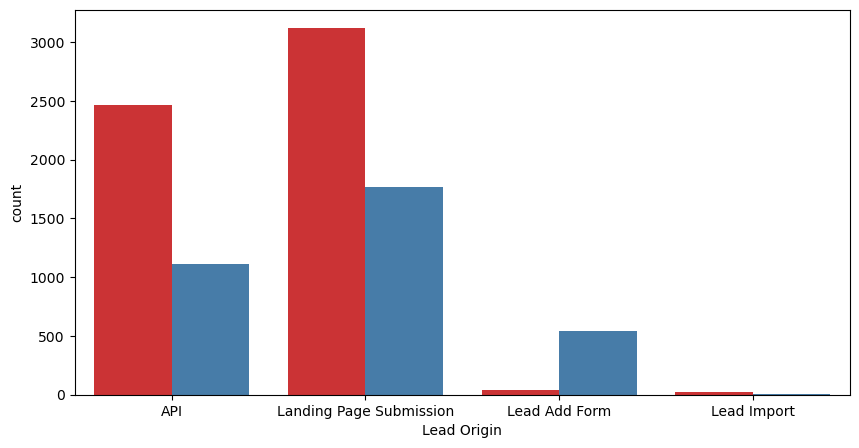

In [33]:
top_origins = leads["Lead Origin"].value_counts().head(5).index
plt.figure(figsize=(10, 5))
sns.countplot(x="Lead Origin", hue="Converted", data=leads[leads["Lead Origin"].isin(top_origins)], palette="Set1")
plt.xticks(rotation=45)
plt.title("Top 5 Lead Origins by Conversion Status")
plt.show()

**Inference** :

1) API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

2) Lead Add Form has more than 90% conversion rate but count of lead are not very high.

3) Lead Import are very less in count.

*To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.*

3) Lead Source

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, palette='Set1')
plt.xticks(rotation = 90)

In [ ]:
# Need to replace 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [ ]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [ ]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

**Inference**:

  1) Google and Direct traffic generates maximum number of leads.

  2) Conversion Rate of reference leads and leads through welingak website is high.

*To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.*

4) Do not Email

In [ ]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

5) Do not call

In [ ]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

6) Total Visits

In [ ]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

In [ ]:
sns.boxplot(leads['TotalVisits'],orient='vert',palette='Set1')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [ ]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [ ]:
# Visualizing again
sns.boxplot(leads['TotalVisits'],orient='vert',palette='Set1')

In [ ]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads,palette='Set1')

Inference
  
  Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

7) Total time spent on website

In [ ]:
leads['Total Time Spent on Website'].describe()

In [ ]:
sns.boxplot(leads['Total Time Spent on Website'],orient='vert',palette='Set1')

In [ ]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads,palette='Set1')

Inference

  Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time.

8) Page viewed per visit

In [ ]:
leads['Page Views Per Visit'].describe()

In [ ]:
sns.boxplot(leads['Page Views Per Visit'],orient='vert',palette='Set1')

**As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.**

In [ ]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

In [ ]:
# Visualizing again
sns.boxplot(leads['Page Views Per Visit'],palette='Set1',orient='vert')

In [ ]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =leads,palette='Set1')

Inference

Median for converted and unconverted leads is the same.

**Nothing can be said specifically for lead conversion from Page Views Per Visit**

9) Last activity

In [ ]:
leads['Last Activity'].describe()

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

In [ ]:
# We can club the last activities to "Other_Activity" which are having less data.
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [ ]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

1)Most of the lead have their Email opened as their last activity.

2)Conversion rate for leads with last activity as SMS Sent is almost 60%.

10) Country

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most values are 'India' no such inference can be drawn

11) Specialization

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Focus should be more on the Specialization with high conversion rate.

12) What is your current occupation

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Working Professionals going for the course have high chances of joining it.

Unemployed leads are the most in numbers but has around 30-35% conversion rate.

13) Search

In [ ]:
sns.countplot(x = "Search", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

14) Magazine

In [ ]:
sns.countplot(x = "Magazine", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

15) Newspaper Article

In [ ]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

16) X Education Forums

In [ ]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

17) Newspaper

In [ ]:
sns.countplot(x = "Newspaper", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

18) Digital Advertisement

In [ ]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

19) Through Reccomendations

In [ ]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

20) Receive More Updates About Our Courses

In [ ]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

21) Tags

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.

22) Update me on Supply Chain Content

In [ ]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

23) Get updates on DM Content

In [ ]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

24) City

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most leads are from mumbai with around 50% conversion rate.

25) I agree to pay the amount through cheque

In [ ]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

26) A free copy of Mastering The Interview

In [ ]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

27) Last Notable Activity

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

Results

**Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis**

In [ ]:
leads = leads.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

In [ ]:
leads.shape

In [ ]:
leads.info()

Data Preparation

1) Converting some binary variables (Yes/No) to 1/0

In [ ]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[vars] = leads[vars].apply(binary_map)

2) Creating Dummy variables for the categorical features:

'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [ ]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

In [ ]:
# Concatenating the dummy_data to the lead_data dataframe
leads = pd.concat([leads, dummy_data], axis=1)
leads.head()

Dropping the columns for which dummies were created

In [ ]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [ ]:
leads.head()

3) Splitting the data into train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

In [ ]:
# Putting target variable to y
y = leads['Converted']

y.head()

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

4) Scaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

In [ ]:
# Checking the Lead Conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

We have almost 38% lead conversion rate.

Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Model Building

Assessing the model with StatsModels

Model-1

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [ ]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

Model-2

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [ ]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

Model-3

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

In [ ]:
col1 = col1.drop('What is your current occupation_Student')

Model-4

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [ ]:
col1 = col1.drop('Lead Origin_Lead Add Form')

Model-5

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

Checking for VIF values:

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

Model-6

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

In [ ]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Origin_Lead Import')

Model-7

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

Checking for VIF values

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

Model-8

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

Checking for VIF values:

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

Model-9

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

Checking for VIF values:

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

Making Prediction on the Train set

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Making the Confusion matrix

In [ ]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

In [ ]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

In [ ]:
# positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

In [ ]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.

We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

**Plotting the ROC Curve**

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

Assigning Lead Score to the Training data

In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

**Model Evaluation**

In [ ]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

In [ ]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

In [ ]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

In [ ]:
# Positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

In [ ]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

**Precision and Recall**

Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.

Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

In [ ]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

In [ ]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

In [ ]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall .

# Making predictions on the test set

Scaling the test data

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [ ]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[col1]
X_test.head()

In [ ]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

In [ ]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

In [ ]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Assigning Lead Score to the Testing data

In [ ]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

Observations:

After running the model on the Test Data , we obtain:

Accuracy : 80.4 %

Sensitivity : 80.4 %

Specificity : 80.5 %

Results :

1) Comparing the values obtained for Train & Test:

Train Data:

Accuracy : 81.0 %
Sensitivity : 81.7 %
Specificity : 80.6 %

Test Data:

Accuracy : 80.4 %
Sensitivity : 80.4 %
Specificity : 80.5 %

hus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

2) Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [ ]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

**So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :**

In [ ]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

3) Finding out the Important Features from our final model:

In [ ]:
res.params.sort_values(ascending=False)

# **Recommendations:**

The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.

The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.

The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.

The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.

The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.

The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.